In [1]:
# Koda privzeta po Martinuu Štifaru #
#####################################
# Prilagojena za podatke, kajti me- #
# -ritve imajo le dva stolpca, pri  #
# M.Š. pa tri stolpce.              #
#####################################
# Vse zasluge za tole gredo M.Š. <3 #
#####################################

In [3]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [5]:
# Import all measurements from the `./measurements` directory. Each measurement file
# is read into a numpy array (column-first) and added to the `meas_dict` (keys are
# filenames with extentions removed).
meas_dir = os.fsencode('./measurements')
meas_dict = {}
for fname in os.listdir(meas_dir):
    with open(os.path.join(meas_dir, fname)) as file:
        meas = [[float(el) for el in row.split('\t')]
                for row in file.readlines()]
        meas_name = os.fsdecode(fname).removesuffix('.txt')
        meas_dict[meas_name] = np.array(meas).T

PermissionError: [Errno 13] Permission denied: b'./measurements\\.ipynb_checkpoints'

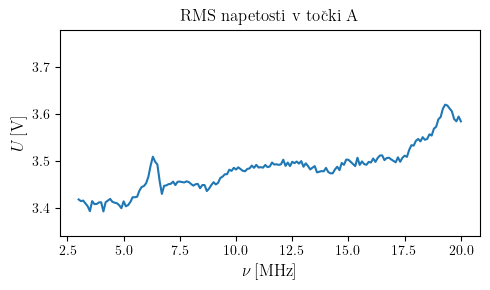

In [90]:
fig, ax = plt.subplots(1, 1, figsize=[5, 3])

# Plot input signal deviations.
ν, U = meas_dict['RMS-at-A']
ax.plot(1e-6 * ν, U)

# Labels and style.
ax.set_title('RMS napetosti v točki A')
ax.set_xlabel(r'$\nu\,[\mathrm{MHz}]$')
ax.set_ylabel(r"$U\,[\mathrm{V}]$")
ax.set_ylim([3.34, 3.78])
fig.tight_layout()
fig.savefig('RMS', dpi=300, bbox_inches='tight', transparent=True)

0 & 0.42 \\
5 & 0.25 \\
10 & 0.17 \\
15 & 0.12 \\
22 & 0.09 \\
33 & 0.05 \\
51 & 0.03 \\
100 & 0.07 \\
215 & 0.14 \\
560 & 0.22 \\
infty & 0.35 \\


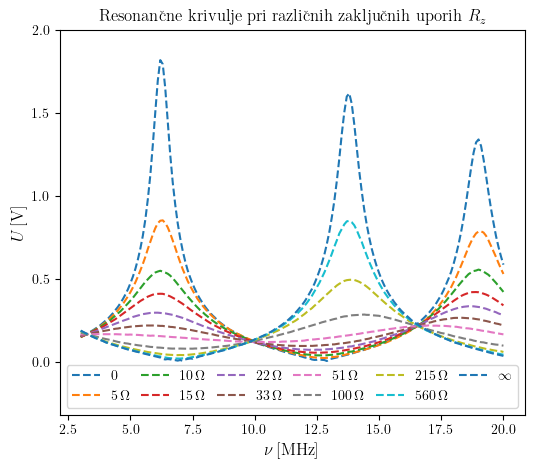

In [92]:
fig, ax = plt.subplots(1, 1, figsize=[6, 5])

def meas_keys_sorting_key(key):
    '''Sorting key function for keys in `meas_dict`.'''
    d = key.split('-')[1]
    if d.isdigit():
        return int(d)
    return 1000 * (d == 'infty')

def R_label(key):
    '''Function for generating label from keys.'''
    t, num = key.split('-')[:2]
    if num == 'infty':
        return r'$\infty$'
    elif num == '0':
        return '0'
    return f'${num}\,\mathrm{{\Omega}}$'

# Plot resonance curves for all R_z.
for i, key in enumerate(sorted(meas_dict, key=meas_keys_sorting_key)):
    t, num = key.split('-')[:2]
    if t == 'response':
        ν, U = meas_dict[key]
        σU = np.std(U)
        print(f'{num} & {σU:.2f} \\\\')
        ax.plot(1e-6 * ν, U, label=R_label(key), linestyle='--')

# Labels and style.
ax.set_title('Resonančne krivulje pri različnih zaključnih uporih $R_z$')
ax.set_xlabel(r'$\nu\,[\mathrm{MHz}]$')
ax.set_ylabel(r"$U\,[\mathrm{V}]$")
ax.set_ylim([-0.32, 2])
ax.legend(loc="lower left", mode="expand", ncol=6)
fig.savefig('resonance', dpi=300, bbox_inches='tight', transparent=True)

(6.199999999999999, 0.906152)

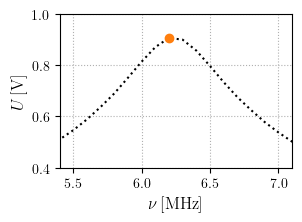

In [94]:
fig, ax = plt.subplots(1, 1, figsize=[3, 2])

# Finding the frequency of first peak (ℓ = λ/4).
ν, U = np.mean([
    meas_dict['response-0'],
    meas_dict['response-5'],
    meas_dict['response-10'],
    meas_dict['response-15']], axis=0)
i = np.argmax(U)
ν_max, U_max = ν[i], U[i]
ax.plot(1e-6 * ν, U, color='black', linestyle=':')
ax.set_xlim([5.4, 7.1])
ax.set_ylim([0.4, 1])
ax.scatter(1e-6 * ν_max, U_max, color='tab:orange', zorder=3)
ax.grid(linestyle=':')
ax.set_xlabel(r'$\nu\,[\mathrm{MHz}]$')
ax.set_ylabel(r"$U\,[\mathrm{V}]$")
fig.savefig('max', dpi=300, bbox_inches='tight', transparent=True)
1e-6 * ν_max, U_max

#print(np.mean([meas_dict["response-0"], meas_dict["response-5"], meas_dict["response-10"], meas_dict["response-15"]], axis = 0))

In [84]:
ℓ, Δℓ = 704e-2, 1e-2
c_0 = 299_792_458

Δν_max = 1e6
ε = (c_0 / (ν_max*4*ℓ))**2
Δε = np.sqrt(
    ((c_0 / (4*ℓ))**2 * -2 / ν_max**3 * Δν_max)**2 +
    ((c_0 / (ν_max*4))**2 * -2 / ℓ**3 * Δℓ)**2
)
ε, Δε

(2.9484429294499073, 0.9511475057800849)

In [86]:
d, Δd = 0.8e-3, 0.02e-3
D, ΔD = 2.95e-3, 0.02e-3
ε_0 = 8.854e-12
μ_0 = 1.256e-6
C_spec = 2*np.pi * ε*ε_0 / np.log(D/d)
ΔC_spec = np.sqrt(
    (2*np.pi * ε_0 / np.log(D/d) * Δε)**2
    # Error from D and d are smaller than error from ε, so we exlude them.
)
L_spec = μ_0 / (2*np.pi) * np.log(D/d)
ΔL_spec = np.sqrt(
    ((μ_0 / (2*np.pi) * 1/D) * ΔD)**2 +
    ((μ_0 / (2*np.pi) * -1/d) * Δd)**2
)
Z_0 = np.sqrt(L_spec / C_spec)
ΔZ_0 = np.sqrt(
    (-np.sqrt(L_spec) / (2 * (C_spec)**(3/2)) * ΔC_spec)**2 +
    (1 / (2 * np.sqrt(L_spec) * np.sqrt(C_spec)) * ΔL_spec)**2
)
1e9 * C_spec, 1e9 * ΔC_spec, 1e6 * L_spec, 1e6 * ΔL_spec, Z_0, ΔZ_0

(0.12569519198437257,
 0.04054840850075069,
 0.2608574336554374,
 0.0051779674616151605,
 45.55565295793632,
 7.361868147865471)